## SVM Classification for Crop Recommendation

One-vs-One (OvO) Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        18
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        13
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        12
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.90      1.00      0.95        19
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.90      0.95        20
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.

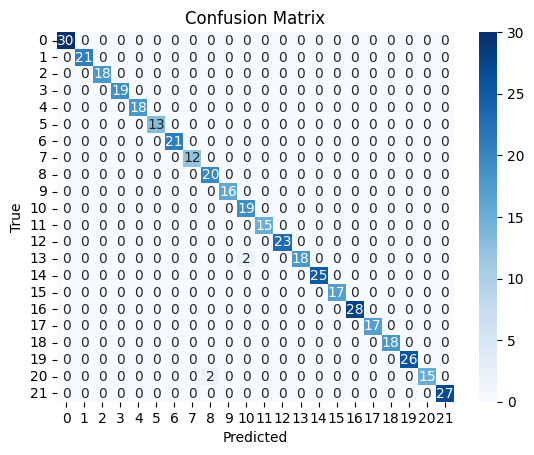

In [3]:
# Import necessary libraries
from pymongo import MongoClient
import pandas as pd
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Adjust the URL as needed
db = client['crop_database']  # Replace with your database name
collection = db['crops']  # Replace with your collection name

# Retrieve the data from MongoDB
data = list(collection.find())

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Drop MongoDB-specific `_id` field if present
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

x = df[['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']] 
y = df['label']  

# Split the data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(x, y,train_size=0.8,test_size=0.2,random_state=123)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42)

# One-vs-One (OvO) approach
ovo_classifier = OneVsOneClassifier(svm)
ovo_classifier.fit(X_train, y_train)
y_pred_ovo = ovo_classifier.predict(X_test)

# Evaluate and print results
print("One-vs-One (OvO) Classification Report:")
print(classification_report(y_test, y_pred_ovo))
print("Accuracy (OvO):", accuracy_score(y_test, y_pred_ovo))

cm = confusion_matrix(y_test, y_pred_ovo)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion1.png')
plt.show()


## Create a GUI using Tkinter to interact with the user

In [4]:
import tkinter as tk
from tkinter import messagebox
import joblib


joblib.dump(ovo_classifier, 'crop_recommendation_model.pkl')
# Load the pre-trained model
model = joblib.load('crop_recommendation_model.pkl')

# Create the main window
root = tk.Tk()
root.title("Crop Recommendation")

# Create input fields
# Create labels and input fields for each feature
tk.Label(root, text="Enter Nitrogen (N):").grid(row=0, column=0)
n_entry = tk.Entry(root)
n_entry.grid(row=0, column=1)

tk.Label(root, text="Enter Phosphorus (P):").grid(row=1, column=0)
p_entry = tk.Entry(root)
p_entry.grid(row=1, column=1)

tk.Label(root, text="Enter Potassium (K):").grid(row=2, column=0)
k_entry = tk.Entry(root)
k_entry.grid(row=2, column=1)

tk.Label(root, text="Enter pH Level:").grid(row=3, column=0)
ph_entry = tk.Entry(root)
ph_entry.grid(row=3, column=1)

tk.Label(root, text="Enter Temperature:").grid(row=4, column=0)
temp_entry = tk.Entry(root)
temp_entry.grid(row=4, column=1)

tk.Label(root, text="Enter Humidity:").grid(row=5, column=0)
humidity_entry = tk.Entry(root)
humidity_entry.grid(row=5, column=1)

tk.Label(root, text="Enter Rainfall:").grid(row=6, column=0)
rainfall_entry = tk.Entry(root)
rainfall_entry.grid(row=6, column=1)

# Define the function to make predictions
def predict():
    try:
        # Get the values from the entry fields
        n = float(n_entry.get())
        p = float(p_entry.get())
        k = float(k_entry.get())
        ph = float(ph_entry.get())
        temperature = float(temp_entry.get())
        humidity = float(humidity_entry.get())
        rainfall = float(rainfall_entry.get())

        # Create the input feature vector for prediction
        input_data = [[n, p, k, ph, temperature, humidity, rainfall]]

        # Predict the crop
        prediction = model.predict(input_data)

        # Show the prediction result in a message box
        messagebox.showinfo("Prediction", f"The recommended crop is: {prediction[0]}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers for all features!")

# Create the Predict button
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=7, columnspan=2)

# Run the main loop
root.mainloop()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
